2. Знакомство с новыми данными: данные о квартирах от Сбера

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()
#display(sber_data.tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [ ]:
sber_data.info()

Задание 2.2

In [ ]:
# Сколько районов Москвы и Московской области представлено в данных?
sber_data['sub_area'].value_counts()
# 146

Задание 2.3

In [7]:
# Чему равна максимальная цена квартир (price_doc)? Введите это число полностью, без округлений.
sber_data['price_doc'].max()

111111112

Задание 2.4

In [12]:
pivot = sber_data.pivot_table(
    values='price_doc',
    columns='id',
    index='ecology',
)
pivot

id,1,2,3,4,5,6,7,8,9,10,...,30464,30465,30466,30467,30468,30469,30470,30471,30472,30473
ecology,,,,,,,,,,,,,,,,,,,,,
excellent,NaN,6000000.0,NaN,NaN,16331452.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6750554.0,NaN,NaN,NaN,NaN,NaN
good,5850000.0,NaN,NaN,13100000.0,NaN,NaN,NaN,2000000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7400000.0,NaN,NaN,NaN,NaN
no data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6970959.0,NaN,NaN
poor,NaN,NaN,5700000.0,NaN,NaN,9100000.0,5500000.0,NaN,5300000.0,NaN,...,NaN,NaN,NaN,10262010.0,NaN,NaN,25000000.0,NaN,NaN,5600000.0
satisfactory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000000.0,...,5000000.0,10544070.0,12000000.0,NaN,NaN,NaN,NaN,NaN,13500000.0,NaN


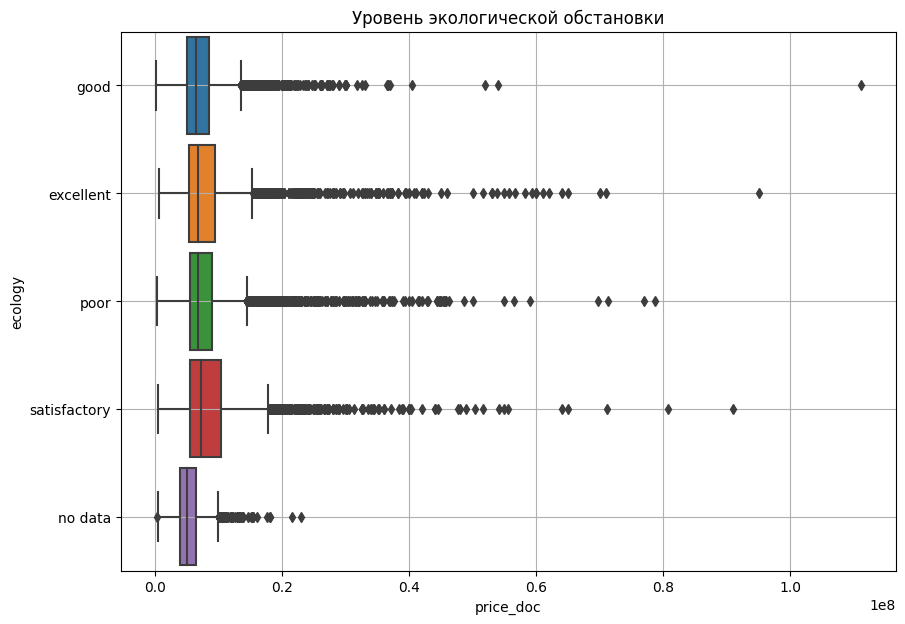

In [3]:
# Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры.
# Постройте коробчатую диаграмму цен на квартиры (price_doc) в зависимости от уровня экологической 
# обстановки в районе (ecology). Какой уровень ценится на рынке меньше всего?
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=sber_data,
    y='ecology',
    x='price_doc',
    
    width=0.9
)
boxplot.set_title('Уровень экологической обстановки');
boxplot.set_xlabel('price_doc');
boxplot.set_ylabel('ecology');
boxplot.grid()
# no data


Задание 2.5

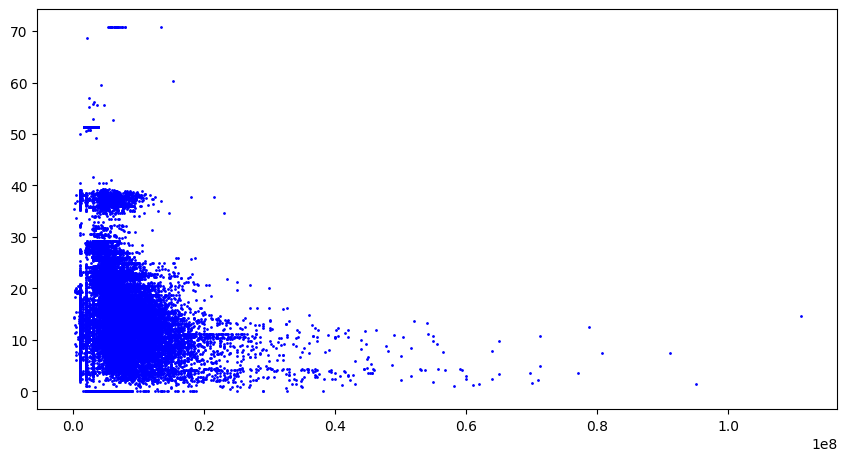

In [25]:
# Постройте диаграмму рассеяния, которая покажет, как цена на квартиру (price_doc)
# связана с расстоянием до центра Москвы (kremlin_km). Выберите все верные утверждения.
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=sber_data['price_doc'], 
    y=sber_data['kremlin_km'], 
    s=1,
    marker='o',
    c = 'blue'
);

In [ ]:
display(sber_data.isnull().tail())

СПИСОК СТОЛБЦОВ С ПРОПУСКАМИ

In [150]:
# Первый способ — это вывести на экран названия столбцов, где число пропусков больше 0. 
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

СТОЛБЧАТАЯ ДИАГРАММА ПРОПУСКОВ

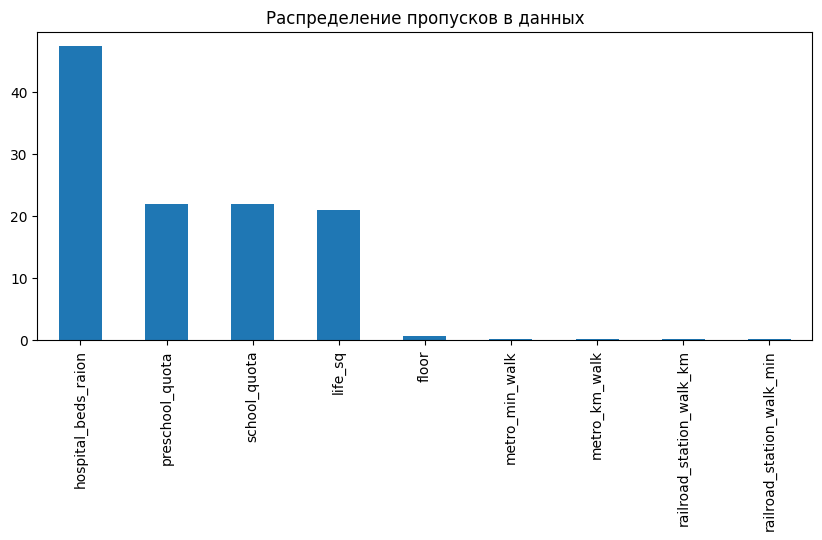

In [50]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

ТЕПЛОВАЯ КАРТА ПРОПУСКОВ

In [ ]:
# Ещё один распространённый способ визуализации пропусков — тепловая карта.


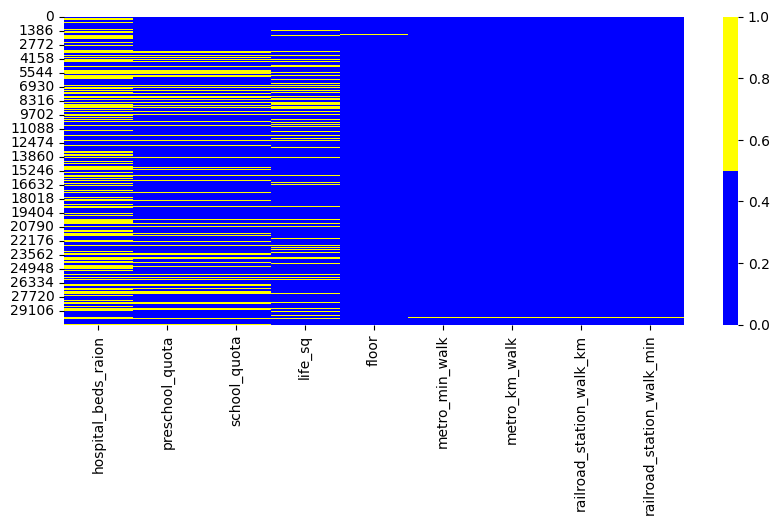

In [51]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

4. Работа с пропусками: методы обработки

МЕТОДЫ ОБРАБОТКИ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ

ОТБРАСЫВАНИЕ ЗАПИСЕЙ И ПРИЗНАКОВ

In [52]:
# Первая техника — самая простая из всех. Она предполагает простое
# удаление записей или признаков, в которых содержатся пропуски. 
#создаем копию исходной таблицы
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()
print(drop_data.shape)

(20888, 60)


ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ

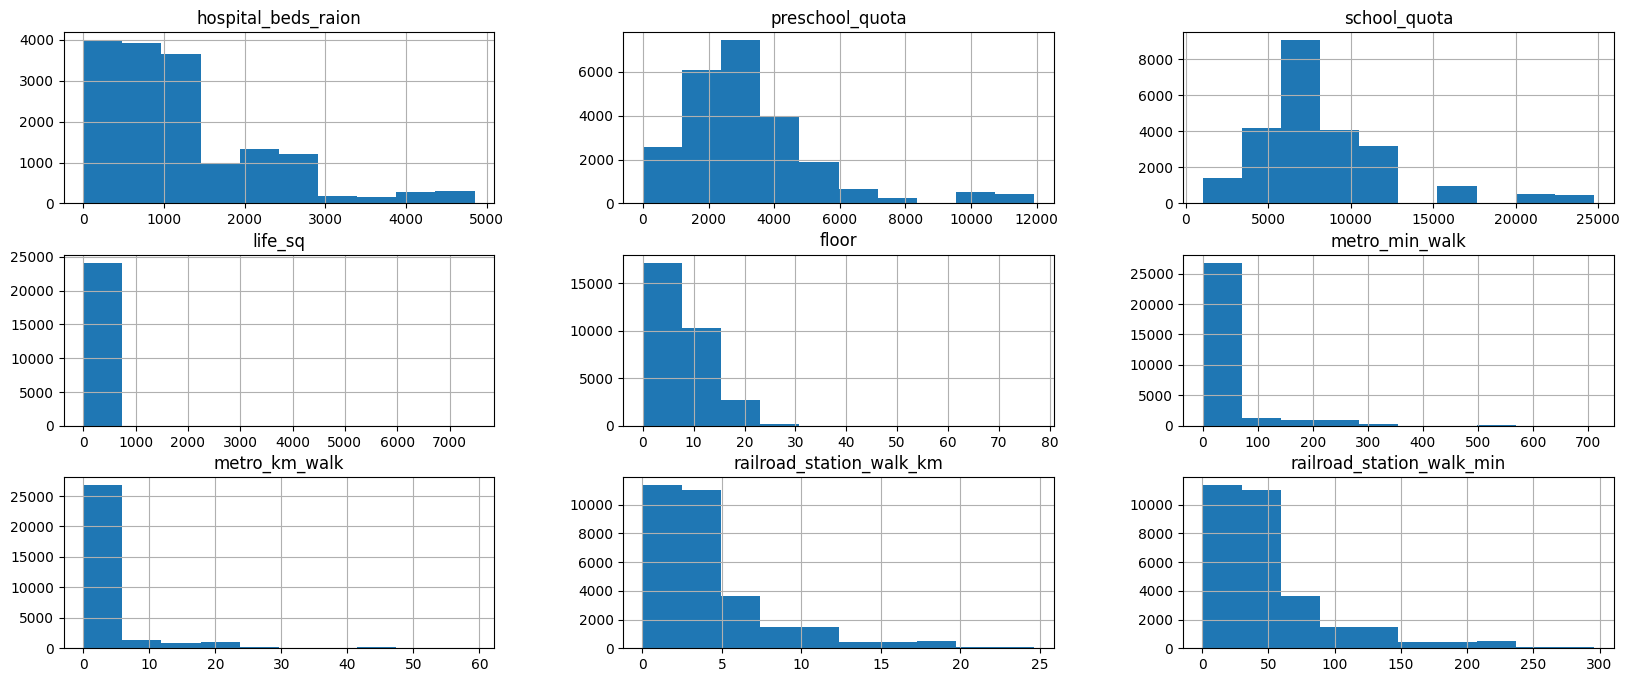

In [53]:
# Чаще всего пустые места заполняют средним/медианой/модой для 
# числовых признаков и модальным значением для категориальных признаков. 
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8));

In [54]:
#создаем копию исходной таблицы
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

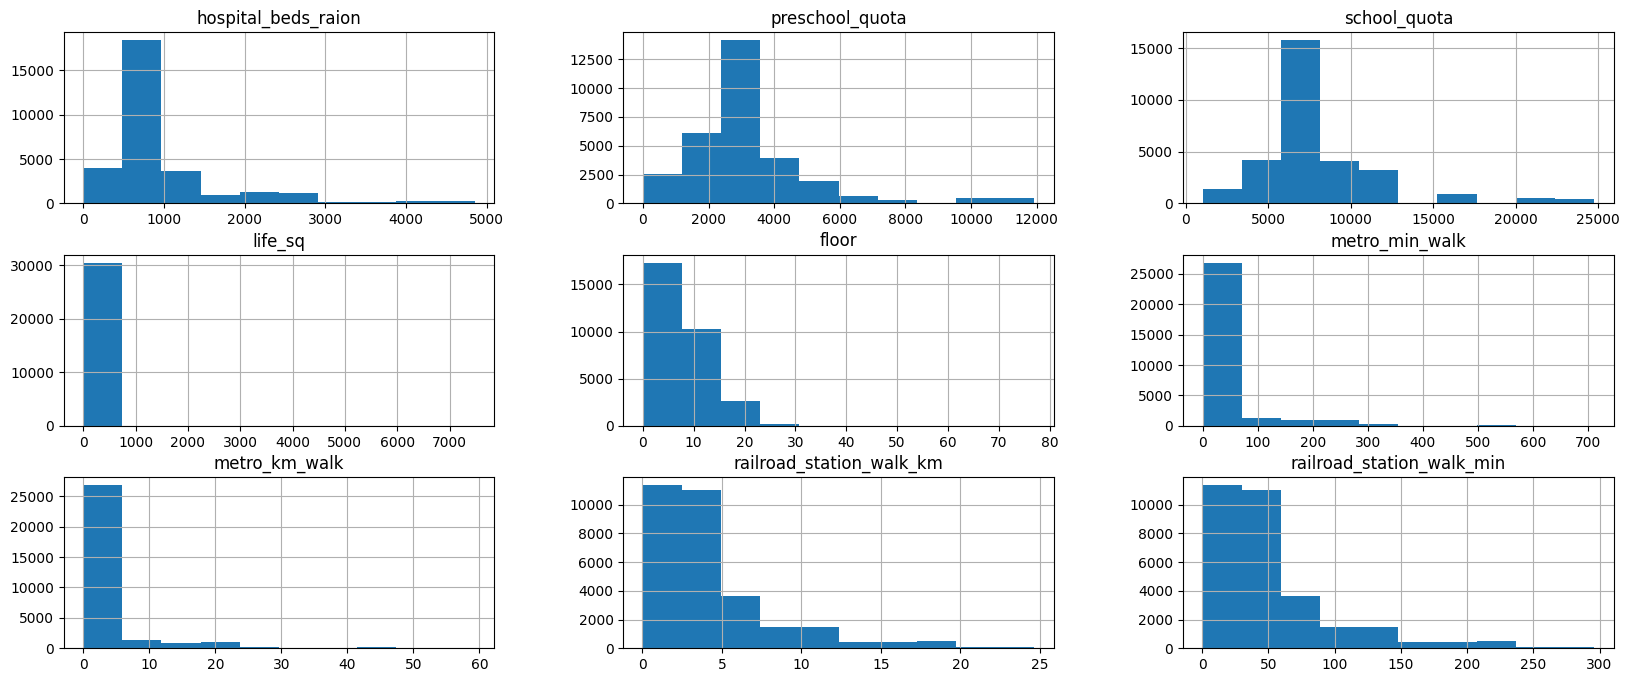

In [55]:
# Посмотрим, на то, как изменились распределения наших признаков:
cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));

ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ С ДОБАВЛЕНИЕМ ИНДИКАТОРА

In [56]:
# Эта эвристика пытается снизить влияние искажения признака,
# указав модели на места, где мы «нафантазировали» данные.

#создаем копию исходной таблицы
indicator_data = sber_data.copy()
#в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропусков
indicator_data.isnull().mean()

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

КОМБИНИРОВАНИЕ МЕТОДОВ

In [ ]:
# удалить столбцы, в которых более 30 % пропусков;
# удалить записи, в которых более двух пропусков одновременно;
# заполнить оставшиеся ячейки константами.

#создаём копию исходной таблицы
combine_data = sber_data.copy()

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0] #число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(thresh=m-2, axis=0)

#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.isnull().mean())
print(combine_data.shape)


Задание 4.3

In [ ]:
# Вам предоставлен условный DataFrame data, в котором есть пропуски.
# Выберите код, который позволит удалить только те записи, для которых отсутствуют 
# все значения признаков.
# data.dropna(axis=0, how='all') 

Задание 4.4

In [ ]:
# Вам предоставлен условный DataFrame data, в котором есть пропуски.
# Число столбцов в этой таблице — 5. Выберите код, который позволит удалить записи,
# где отсутствует более двух признаков одновременно.
# data.dropna(axis=0, thresh=3) 

Задание 4.5

In [ ]:
# Вам предоставлен условный DataFrame data, в котором есть пропуски в столбцах price
# (цена товара) и count_orders (количество заказов). Какой из приведённых ниже кодов 
# позволит заполнить цену товара медианным значением, а количество заказов — нулём?
# data.fillna(value={'price': data['price'].median(), 'count_orders': 0}) верно

ЗАДАНИЕ 4.6

In [59]:
# Ваша задача — очистить данную таблицу от пропусков следующим образом:
# - Если признак имеет больше 50 % пропущенных значений, удалите его.
# - Для оставшихся данных: если в строке более двух пропусков, удалите строку.
# - Для оставшихся данных: числовые признаки заполните средним значением, 
# а категориальные — модой.

import pandas as pd

df = pd.read_csv('data/test_data.csv')
display(df)
#удаляем столбцы, в которых более 50% (100-50) пропусков
thresh = df.shape[0]*0.5
df = df.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть более 2 пропусков
m = df.shape[1] #число признаков после удаления столбцов
df = df.dropna(thresh=m-2, axis=0) 
#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'one': df['one'].mean(),
    'two': df['two'].mean(),
    'three': df['three'].mean(),
    'four': df['four'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
df = df.fillna(values)

display(df)


,one,two,three,four,five
0,1.331587,0.715279,-1.545400,bar,NaN
1,NaN,NaN,1.000000,NaN,NaN
2,-0.008384,0.621336,-0.720086,bar,NaN
3,1.000000,0.500000,0.500000,NaN,NaN
4,0.265512,0.108549,0.004291,bar,yes
5,-0.174600,0.433026,1.203037,bar,NaN
6,NaN,NaN,1.200000,hist,NaN
7,-0.965066,1.028274,0.228630,bar,NaN


,one,two,three,four
0,1.331587,0.715279,-1.545400,bar
2,-0.008384,0.621336,-0.720086,bar
3,1.000000,0.500000,0.500000,bar
4,0.265512,0.108549,0.004291,bar
5,-0.174600,0.433026,1.203037,bar
6,0.241508,0.567744,1.200000,hist
7,-0.965066,1.028274,0.228630,bar


6. Методы выявления выбросов

МЕТОД РУЧНОГО ПОИСКА И ЗДРАВОГО СМЫСЛА

In [60]:
sber_data['life_sq'].describe()
# Найдём число квартир с нулевой жилой площадью:
print(sber_data[sber_data['life_sq'] == 0].shape[0])

45


In [61]:
# А теперь выведем здания с жилой площадью более 7 000 квадратных метров:
display(sber_data[sber_data['life_sq'] > 7000])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


МЕТОД МЕЖКВАРТИЛЬНОГО РАЗМАХА (МЕТОД ТЬЮКИ)

In [ ]:
sber_data

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');


In [64]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

Задание 6.1

In [ ]:
# Давайте немного модифицируем функцию outliers_iqr(). Добавьте в неё параметры left и right, 
# которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5). 
# Функция, как и раньше, должна возвращать потенциальные выбросы и очищенный DataFrame

In [66]:
ddata = sber_data
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x> upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(ddata, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


Задание 6.2

In [ ]:
# Давайте ослабим границы метода Тьюки справа и усилим их влево. Примените модифицированную 
# функцию outliers_iqr_mod() к признаку full_sq из таблицы sber_data данным с параметрами left=1 
# и right=6. Результаты работы поместите в переменные outliers и cleaned. Чему равно результирующее 
# число выбросов в данных?

ddata11 = pd.read_csv('data/sber_data.csv')

def outliers_iqr_mod(data, feature, left=1, right=6):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x> upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(ddata11, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

МЕТОД Z-ОТКЛОНЕНИЙ (МЕТОД СИГМ)

In [ ]:
# Рассмотрим логарифмирование на примере
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');



In [21]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438


In [22]:
print(outliers['sub_area'].unique())

['Poselenie Rogovskoe' 'Poselenie Kievskij']


In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution')


Задание 6.4 и 6.6

In [82]:
def outliers_z_score_mod(data, feature, left=3.7, right=0.7, log_scale=True):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', left=3.7, right=3.7, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}') #'mkad_km',

Число выбросов по методу z-отклонения: 52
Результирующее число записей: 30419


Задание 6.7

In [92]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')

Число выбросов по методу Тьюки: 92


7. Работа с дубликатами и неинформативными признаками

ОБНАРУЖЕНИЕ И ЛИКВИДАЦИЯ ДУБЛИКАТОВ

In [93]:
sber_data['id'].nunique() == sber_data.shape[0]

True

In [94]:
# Создадим маску дубликатов с помощью метода duplicated() и произведём фильтрацию
# . Результат заносим в переменную sber_duplicates. Выведем число строк в
# результирующем DataFrame:
dupl_columns = list(sber_data.columns)
dupl_columns.remove('id')

mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

Число найденных дубликатов: 562


In [95]:
# Создадим новую таблицу sber_dedupped, которая будет версией исходной таблицы,
# очищенной от полных дубликатов.
sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {sber_dedupped.shape[0]}')

Результирующее число записей: 29909


НЕИНФОРМАТИВНЫЕ ПРИЗНАКИ

ОБНАРУЖЕНИЕ И ЛИКВИДАЦИЯ НЕИНФОРМАТИВНЫХ ПРИЗНАКОВ

In [96]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений
big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений


In [97]:
information_sber_data = sber_data.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_sber_data.shape[1]}')

Результирующее число признаков: 55


8. Закрепление знаний

In [99]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female


Задание 8.1

In [104]:
# Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их.
# Для поиска используйте все признаки в данных. Сколько записей осталось в данных?
# поиск дупликатов
dupl_columns = list(diabetes.columns)
mask = diabetes.duplicated(subset=dupl_columns)
diabetes_duplicates = diabetes[mask]
print(f'Число найденных дубликатов: {diabetes_duplicates.shape[0]}')
# удаляем дупликаты
diabetes_dedupped = diabetes.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {diabetes_dedupped.shape[0]}')

Число найденных дубликатов: 10
Результирующее число записей: 768


In [ ]:
diabetes_dedupped

Задание 8.2

In [107]:
# Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога
# информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются 
# или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes_dedupped.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_dedupped[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_dedupped[col].nunique() / diabetes_dedupped[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
information_diabetes_dedupped = diabetes_dedupped.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_diabetes_dedupped.shape[1]}')

Gender: 100.0% одинаковых значений
Результирующее число признаков: 9


Задание 8.3

In [180]:
diabetes_data = information_diabetes_dedupped.copy()
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0
764,1,96,122,0,0,22.4,0.207,27,0
765,10,101,86,37,0,45.6,1.136,38,1
766,0,141,0,0,0,42.4,0.205,29,1


In [181]:
# Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, 
# Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.
# Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

#for i in range(len(diabetes_data)):
      #if diabetes_data.loc[i, 'Glucose']==0: diabetes_data.loc[i, 'Glucose'] = np.nan
list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']      
for i in range(len(diabetes_data)):
      for k in list:
            if diabetes_data.loc[i, k] == 0:
                  diabetes_data.loc[i, k] = np.nan
            
cols_null_percent = diabetes_data.isnull().mean()
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)
            




Insulin          0.486979
SkinThickness    0.295573
BloodPressure    0.045573
BMI              0.014323
Glucose          0.006510
dtype: float64

Задание 8.4

In [182]:
# Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков 
# осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = diabetes_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
diabetes_data = diabetes_data.dropna(thresh=thresh, axis=1)
#отображаем результирующую долю пропусков
diabetes_data.isnull().mean()
print(diabetes_data.shape)
print(f'Результирующее число признаков: {diabetes_data.shape[1]}')



(768, 8)
Результирующее число признаков: 8


Задание 8.5

In [191]:
# Удалите из данных только те строки, в которых содержится более двух пропусков одновременно.
# Чему равно результирующее число записей в таблице?
#удаляем записи, в которых есть более 2 пропусков
dff = diabetes_data
m = dff.shape[1] #число признаков после удаления столбцов
dff = dff.dropna(thresh=m-2, axis=0) 
print(f'Результирующее число признаков: {dff.shape[0]}')


Результирующее число признаков: 761


Задание 8.6

In [193]:
cols_null_percent = dff.isnull().mean()
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

SkinThickness    0.289093
BloodPressure    0.036794
Glucose          0.006570
BMI              0.005256
dtype: float64

In [200]:
# В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness?
# Ответ округлите до десятых.
#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'SkinThickness': dff['SkinThickness'].median(),
    'BloodPressure': dff['BloodPressure'].median(),
    'Glucose': dff['Glucose'].median(),
    'BMI': dff['BMI'].median()
}
#заполняем оставшиеся записи константами в соответствии со словарем values
dff = dff.fillna(values)

display(dff['SkinThickness'].mean())

29.109067017082786

Задание 8.7


In [202]:
# Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?
diabetes_dff = dff 
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(diabetes_dff, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


Задание 8.8

In [204]:
# Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(diabetes_dff, 'SkinThickness', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


Задание 8.9

In [212]:
# На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. 
# Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании 
# признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического
# метода межквартильного размаха.
# Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу
# прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(diabetes_dff, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')



Число выбросов по методу Тьюки: 29


In [213]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr_mod(diabetes_dff, 'DiabetesPedigreeFunction', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')

Число выбросов по методу Тьюки: 0
